# Clase Nº 4

**Plan de la clase:**  
**(1)** Preguntas sobre la clase asincrónica - Revisar el cuestionario. <br>
**(2)** Comentarios sobre la modalidad de entrega del TP4. <br>
**(3)** Repasar `pandas` y `seaborn` (y widgets) <br>
**(4)** Repasar expresiones regulares (y widgets) <br>
**(5)** _Fuzzy matching_

### Preguntas sobre la clase asincrónica / cuestionario

#### Ayudamemoria
**Algunos caracteres especiales:** <br>
`\d`: match cumando el string contiene digitos (equivalente a [0-9]) <br>
`\D`: match cuando el string NO contiene digitos <br>
`\s`: match cuando el string contiene un espacio en blanco <br>
`\S`: match cuando el string NO contiene un espacio en blanco <br>
`\w`: match cuando el string contiene caracteres de alfanuméricos o "\_" <br>
`\W`: match cuando el string NO contiene caracteres de alfanuméricos o "\_" <br>

**Cuantificadores:** <br>
`?`: matchea 0 ó 1 instancias del patrón que precede. <br>
`*`: 0 o más. <br>
`+`: 1 o más. <br>
`{n}` (_este y los siguientes no los vimos en la asincrónica_): matchea `n` repeticiones. <br>
`{m,}`: matchea al menos `m` repeticiones. <br>
`{m,n}`: matches entre `m` y `n` repeticiones. <br>

___

Revisemos la pregunta 3 del cuestionario, que consistía de los siguientes dos incisos.

3) Escribir una expresión regular que matchee con:

a.  un string que _contiene_ una letra `a` seguida de cualesquiera  caracteres, y termina en una letra `b`.

In [2]:
import re

In [14]:
strings_prueba = [
    "12ab091a00abaaba---b",
    "12ab 091a00ab aab a---b",
    "ab abc abecedario"
]

In [23]:
varias_regex = [
  "a.*b", # correcto
  "a.+b", # correcto, si interpretan que debe haber 1 o más "cualesquiera caracteres", esta sería la expresión regular correcta.
  "a.*?b", # el ? permite que re.findall encuentre submatches dentro de un match grande (por defecto devuelve el grande)
  "a.+?b", # ídem arriba, pero no encuentre el primer match, "ab", porque no hay caracteres entre la "a" y la "b
  "a\w*b", # \w sólo tiene en cuenta caracteres alfanuméricos
  "a\w+b", # ídem arriba, pero debe haber al menos un carácter alfanumérico
  "\w*a\w+b\w*", # para que matchee los caracteres alfanuméricos que puedan venir antes y después de la "b" (como el espacio no es un carácter alfanumérico, esto "corta" en palabras)
  "[a].*[b]", # los corchetes alrededor de un solo caracter no son necesarios, normalmente se usan para conjuntos de varios posibles caracteres
]

for string_prueba in strings_prueba:
    print(f"String de prueba: {string_prueba}")
    for regex in varias_regex:
        print(f"  {regex}: {re.findall(regex, string_prueba)}")
    print()

String de prueba: 12ab091a00abaaba---b
  a.*b: ['ab091a00abaaba---b']
  a.+b: ['ab091a00abaaba---b']
  a.*?b: ['ab', 'a00ab', 'aab', 'a---b']
  a.+?b: ['ab091a00ab', 'aab', 'a---b']
  a\w*b: ['ab091a00abaab']
  a\w+b: ['ab091a00abaab']
  \w*a\w+b\w*: ['12ab091a00abaaba']
  [a].*[b]: ['ab091a00abaaba---b']

String de prueba: 12ab 091a00ab aab a---b
  a.*b: ['ab 091a00ab aab a---b']
  a.+b: ['ab 091a00ab aab a---b']
  a.*?b: ['ab', 'a00ab', 'aab', 'a---b']
  a.+?b: ['ab 091a00ab', 'aab', 'a---b']
  a\w*b: ['ab', 'a00ab', 'aab']
  a\w+b: ['a00ab', 'aab']
  \w*a\w+b\w*: ['091a00ab', 'aab']
  [a].*[b]: ['ab 091a00ab aab a---b']

String de prueba: ab abc abecedario
  a.*b: ['ab abc ab']
  a.+b: ['ab abc ab']
  a.*?b: ['ab', 'ab', 'ab']
  a.+?b: ['ab ab']
  a\w*b: ['ab', 'ab', 'ab']
  a\w+b: []
  \w*a\w+b\w*: []
  [a].*[b]: ['ab abc ab']



b. un string que _contiene_ una o más letras `a` seguidas inmediatamente de cero o más dı́gitos.

Las dos formas que encontré de interpretar esta consigna son las siguientes:
- Las letras `a`'s pueden ser una o más pero van juntas. Ejemplos: `"aaaa124324"`, `"a"`, `"aa"`, `"a12"`. Esta es la interpretación más fácil de resolver.
- _Cada letra_ `a` va seguida de cero o más digitos. Ejemplos: `"a"`, `"a1a12a123"`, `"a125a1324a123"` y `"aa12"` (una `a` seguida de cero dígitos y una a seguida de dos dígitos). Esta interpretación es más difícil, y requiere una forma de expresar la repetición de una expresión regular (lo cual no vimos en la asincrónica).

Veamos cómo resolver el primer caso:

In [22]:
regex = "a+\d*"
# regex1 = "a+[0-9]*" # equivalente
# regex2 = "a+[0123456789]*" # otra regex equivalente

algunos_strings = ["asaas0000", "a0000", "aba0000"]

for string in algunos_strings:
    print(re.findall(regex, string))

['a', 'aa']
['a0000']
['a', 'a0000']


Ahora resolvamos el segundo caso: para hacerlo, necesitamos algo que no vimos, que es una forma de expresar la repetición de una expresión regular. Para eso, necesitamos un cuantificador, en este caso puede ser el `+` para indicar que la regex debe repetirse una o más veces.

In [56]:
pattern = r'(a\d*){2}'
regex = re.compile(pattern)
regex.findall("a125a1324a123")

['a1324']

## Modalidad de entrega del TP Nº4

El próximo TP va a ser entregado nuevamente a través de GitHub, pero en este caso va ser **grupal**.

Un miembro del grupo debe crear un repositorio en GitHub como se hizo en el TP3, y agregar como colaboradores a sus dos compañeros y a los docentes.

Un requisito va ser que cada miembro del grupo haga al menos un commit, con contribuciones sustanciales.
Para esto es importante que tengan configurado su nombre de usuario de `git` con el mismo nombre que el de GitHub, así los podemos identificar fácilmente.

## Pandas y Seaborn

### Reformateo de `DataFrame`'s

Sigamos trabajando con el DataFrame de centrales eléctricas.

In [30]:
import pandas as pd

In [31]:
potencia_df = pd.read_csv("archivos/potencia_instalada_mod.csv", sep="|", encoding="latin1")

In [32]:
potencia_df.region.value_counts()

NOROESTE         2740
BUENOS AIRES     2283
CENTRO           1880
CUYO             1809
COMAHUE          1642
GRAN BS.AS.      1532
NORESTE          1374
LITORAL           971
PATAGONICA        958
GENERAC MOVIL     580
(en blanco)        24
Name: region, dtype: int64

In [33]:
potencia_df.fuente_generacion.value_counts()

Térmica       11191
Renovable      3186
Hidráulica     1266
Nuclear         150
Name: fuente_generacion, dtype: int64

1. Primero, calculemos la potencia total instalada en cada región en un período dado, haciendo un `groupby` y usando la función de agregación adecuada.

In [34]:
potencia_df['periodo_formateado'] = pd.to_datetime(potencia_df['periodo'],format="%d/%m/%Y %H:%M").dt.strftime("%Y-%m") 

In [35]:
df = potencia_df.groupby(by=["periodo_formateado", "region"]).agg({'potencia_instalada_mw': 'sum'}).reset_index()

In [36]:
df.head()

,periodo_formateado,region,potencia_instalada_mw
0,2015-10,(en blanco),558.097
1,2015-10,BUENOS AIRES,5530.320
2,2015-10,CENTRO,2911.284
3,2015-10,COMAHUE,6279.200
4,2015-10,CUYO,1664.430


2. Luego, formateemos el `DataFrame` de manera que los nombres de las regiones sean ahora los nombres de nuevas columnas, y el contenido de la celda sea la potencia instalada en esa región en el período correspondiente (dado en filas). <br>
Hay que ir de un formato "largo" a uno "ancho".
Pueden consultar la documentación acerca de reformateo de dataframes aquí: https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html, para ver qué método necesitarían usar.

In [37]:
df_pivoteado = df.pivot(index = "periodo_formateado", columns='region', values="potencia_instalada_mw") 
df_pivoteado = df_pivoteado.drop("(en blanco)", axis=1)

In [38]:
df_pivoteado.tail(20)

region,BUENOS AIRES,CENTRO,COMAHUE,CUYO,GENERAC MOVIL,GRAN BS.AS.,LITORAL,NORESTE,NOROESTE,PATAGONICA
periodo_formateado,,,,,,,,,,
2018-01,6426.369,3210.920,6788.40,1761.11,199.536,7363.988,3275.48,3080.866,3374.494,1243.90
2018-02,6549.953,3210.920,6788.40,1761.11,NaN,7373.444,3447.48,3080.866,3401.472,1243.90
2018-03,6557.953,3210.920,6788.40,1761.11,NaN,7373.444,3727.48,3080.866,3405.062,1280.90
2018-04,6755.053,3210.920,6788.40,1761.11,NaN,7373.444,3727.48,3080.866,3405.062,1280.90
2018-05,6769.893,3210.920,6788.40,1761.59,NaN,7627.444,3727.48,3080.866,3405.562,1280.90
2018-06,6869.893,3210.920,6788.40,1761.59,NaN,7627.444,3727.48,3080.866,3405.562,1302.90
2018-07,6874.593,3244.139,6848.40,1761.59,NaN,7627.444,3727.48,3080.866,3405.562,1352.40
2018-08,6975.393,3244.139,6848.40,1761.59,NaN,7627.444,3727.48,3080.866,3405.562,1352.40
2018-09,7129.503,3293.339,6848.40,1763.29,NaN,7627.444,3727.48,3080.866,3405.562,1352.40


3. Escribamos una función que reciba como argumento el `DataFrame` formateado como en el punto anterior y un string que represente una región, y utilicemos `seaborn` para hacer un gráfico de la potencia instalada para esa región. Pueden usar, por ejemplo, el tipo de plot `lineplot` (el argumento `data` de la función debe ser el `DataFrame` formateado). Pueden usar los comandos vistos en matplotlib para formatear un plot de Seaborn.

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
def plot(df, region):
    sns.set(rc={'figure.figsize':(10, 4)})
    
    # podemos usar matplotlib.pyplot para modificar el plot
    # (recordar que Seaborn es tan sólo un wrapper)
    plt.xticks(rotation=45, horizontalalignment="right") 
    sns.lineplot(x="periodo_formateado", y=region, data=df)

Probemos la función:

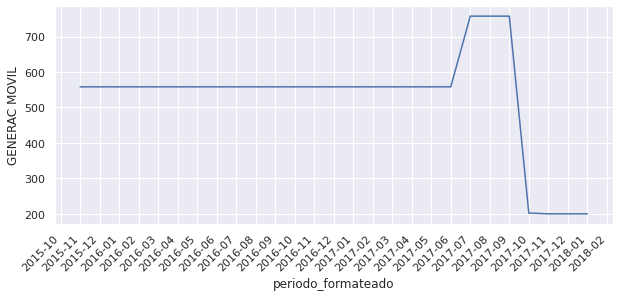

In [42]:
plot(df_pivoteado, "GENERAC MOVIL")

4. Finalmente, usemos un widget reactivo para elegir qué región graficar. Pueden consultar la documentación de widget acá: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html.

In [43]:
import ipywidgets as widgets
from ipywidgets import interact

Definimos el widget (debe ser de tipo `Select`)

In [53]:
# Podríamos hacerlo de esta manera pero habría que eliminar el elemento "(en blanco)"
# region_w = widgets.Select(options=sorted(potencia_df.region.unique()))

# De esta manera no hace falta hacerlo
region_w = widgets.Select(options=sorted(df_pivoteado.columns))

In [57]:
def plot_por_region(region):
    sns.set(rc={'figure.figsize':(20, 4)})
    plot(df_pivoteado, region)
        
interact(plot_por_region, region=region_w);

interactive(children=(Select(description='region', index=9, options=('BUENOS AIRES', 'CENTRO', 'COMAHUE', 'CUY…

Esta forma usa algo que se llama "decoradores". Es equivalente a lo de arriba, pero basta agregar `@interact` antes de la definición de la función.

In [58]:
@interact
def plot_por_region(region=region_w):
    sns.set(rc={'figure.figsize':(15, 4)})
    plot(df_pivoteado, region)

interactive(children=(Select(description='region', index=9, options=('BUENOS AIRES', 'CENTRO', 'COMAHUE', 'CUY…

___________________________________________________

## Expresiones regulares

In [ ]:
import re

#### Ejercicio:
Vamos a seguir trabajando con el Martín Fierro. <br>
Primero repitamos el proceso de _parseo_ realizado durante la clase asincrónica

In [61]:
with open("archivos/martin_fierro.txt") as archivo:
    martin_fierro = archivo.read()

In [62]:
def parsear_martin_fierro(martin_fierro):
    partes = re.split("[IVX]+ - .*\n", martin_fierro)
    partes.pop(0)
    
    estrofas = partes.copy()
    for i in range(len(estrofas)):
        estrofas[i] = re.split("\n\d+\n", estrofas[i])
        estrofas[i].pop(0)
    
    versos = estrofas.copy()
    for i in range(len(versos)):
        for j in range(len(versos[i])):
            versos[i][j] = versos[i][j].split("\n")
            del versos[i][j][-1] # Agregué esto para eliminar el string vacío al final de cada estrofa
    
    # Quitamos
    versos[-1][-1] = versos[-1][-1][0:6]
    
    return versos

In [63]:
versos = parsear_martin_fierro(martin_fierro)

**Consigna**

Construir un _widget_ reactivo tal que uno pueda escribir una expresión regular y, si tal expresión regular matchea con alguna parte del libro, muestre todos los números de parte, estrofa y verso en los que aparece. Si no aparecen en ningún lado, debe imprimir un mensaje diciendo `"La expresión regular <EXPRESIÓN REGULAR> no matchea con ningún verso del Martín Fierro.`

_Ayudas_: 
- El widget que deberían usar es de tipo `Textarea`. 
- Dentro de la función que se le pasa a `interact` debería haber loops `for` anidados (como se hizo en la clase asincrónica), para iterar sobre las estructuras jerárquicas que componen el libro.
- Recordar, por ejemplo, el método `enumerate` que devuelve tanto los índices como los elementos sobre los cuales se itera (no es estrictamente necesario usarlo, pero puede ser útil).


In [64]:
regex_w = widgets.Textarea()
regex_w

Textarea(value='')

In [65]:
@interact
def encontrar_ocurrencia(regex=regex_w):
    regex = re.compile(regex)
    
    print(regex_w.value)
    hay_match = False
    
    for i, parte in enumerate(versos):
      for j, estrofa in enumerate(parte):
        for k, verso in enumerate(estrofa):
            if regex.findall(verso):
                hay_match = True
                print(f"parte {i}, estrofa {j}, verso {k}: {verso}")        
    
    if not hay_match:
        print(f"La expresión regular {regex_w.value} no matchea con ningún verso del Martín Fierro.")

interactive(children=(Textarea(value='', description='regex'), Output()), _dom_classes=('widget-interact',))

_______________________________________________________________

## _Fuzzy matching_

_Fuzzy matching_ refiere al concepto de encontrar correspondencias entre strings que no son exactamente iguales.

Instalemos el módulo `fuzzywuzzy` con `pip install fuzzywuzzy`.

In [66]:
from fuzzywuzzy import fuzz, process

/home/rodrigo/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Distancia de Levenshtein

Es la cantidad mínima de caracteres que deben editarse en un string para equipararlo a otro. Una edición puede ser una inserción, una eliminación o una substitución.

`fuzzywuzzy` es una librería de Python que tiene funciones para medir distancias entre `string`'s. Estima la distancia y devuelve un indicador de similitud entre 0 (menor similitud) y 100 (máxima similitud).

Documentación (es algo básica): https://github.com/seatgeek/fuzzywuzzy

In [67]:
# Simple Ratio
fuzz.ratio("Energía Termica", "Energía Térmica")

93

In [68]:
# Partial Ratio
fuzz.partial_ratio("Energía Termica", "La Energía Térmica es la más común")

93

In [69]:
# Token set ratio
fuzz.token_sort_ratio("La Energía Térmica es la más común", "La más común es Energía Térmica la")

100

In [70]:
# Token set ratio
fuzz.token_set_ratio("La Energía Térmica es la más común", "La más más común es Energía Térmica la la ")

100

In [71]:
from fuzzywuzzy import process

In [72]:
?process.extractOne

Signature:
process.extractOne(
    query,
    choices,
    processor=<function full_process at 0x7f09e16bd940>,
    scorer=<function WRatio at 0x7f09e1d02430>,
    score_cutoff=0,
)
Docstring:
Find the single best match above a score in a list of choices.

This is a convenience method which returns the single best choice.
See extract() for the full arguments list.

Args:
    query: A string to match against
    choices: A list or dictionary of choices, suitable for use with
        extract().
    processor: Optional function for transforming choices before matching.
        See extract().
    scorer: Scoring function for extract().
    score_cutoff: Optional argument for score threshold. If the best
        match is found, but it is not greater than this number, then
        return None anyway ("not a good enough match").  Defaults to 0.

Returns:
    A tuple containing a single match and its score, if a match
    was found that was above score_cutoff. Otherwise, returns None.
File:   

In [73]:
fuentes_validas = ['Térmica','Renovable','Hidráulica','Nuclear']

In [74]:
process.extractOne("Temica", fuentes_validas)

('Térmica', 83)

In [75]:
process.extractOne("Temica", fuentes_validas)[0]

'Térmica'

**Aplicación**: examinemos la tabla de potencia instalada:

In [76]:
df = pd.read_csv("archivos/potencia_instalada_con_errores.csv", sep="|", encoding="latin1")

In [77]:
df['fuente_generacion'].value_counts()

Térmica       6833
Tmica         2219
Termica       1815
Renovable     1781
Hidráulica     918
Renovale       784
Renobavle      621
Temica         324
Hidrulica      263
Nuclear        150
Hidráulia       85
Name: fuente_generacion, dtype: int64

In [78]:
def limpiar_fuente(fuente_generacion, fuentes_validas=['Térmica','Renovable','Hidráulica','Nuclear']):
    '''
    Función toma como input un string que identifica una fuente
    de generación eléctrica mal escrita y la reemplaza por la fuente
    válida más parecida.
    '''
            
    fuente_procesada = process.extractOne(fuente_generacion, fuentes_validas)[0]    
    return fuente_procesada

In [79]:
df['fuente_generacion'] = df['fuente_generacion'].apply(limpiar_fuente)

In [80]:
df['fuente_generacion'].value_counts()

Térmica       11191
Renovable      3186
Hidráulica     1266
Nuclear         150
Name: fuente_generacion, dtype: int64